Accuracy of model is: 100.0 %
Elapsed time: 0.5563826560974121 seconds


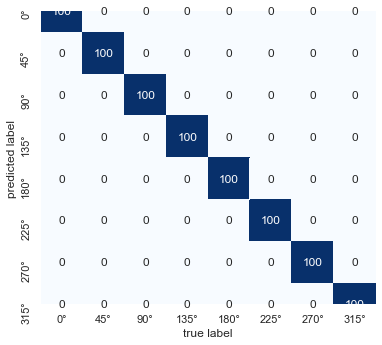

In [4]:
#I used also the DecisionTree model but it gives a lower accuracy
#I used also their autoencoder and decoder but it gives a lower accuracy for my model (BaggingClassifier) 
import math
import numpy as np
from get_csv_data import HandleData
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from time import time

if __name__ == '__main__':
	test_percentage = 0.2

	seed = 1234

	#instance of the Handle Data class
	data = HandleData(oneHotFlag=False)
	#get the data
	antenna_data, label_data = data.get_synthatic_data()
	antenna_data, antenna_data_test, label_data, label_test = train_test_split (antenna_data, label_data, \
		test_size=test_percentage, random_state=42)

	#Instantiate a Bagging Classifier
	clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=300, max_samples=500, \
		bootstrap=False, n_jobs=-1, random_state=42)
	#Train model
	tic = time()
	clf.fit(antenna_data, label_data)
	#Predict
	y_pred = clf.predict(antenna_data_test)
			
	print('Accuracy of model is:', accuracy_score(label_test, y_pred)*100, '%')
	print('Elapsed time:', time() - tic, 'seconds')
	
	mat = confusion_matrix(label_test, y_pred)
	mat = np.round(mat / mat.astype(np.float).sum(axis=0) *100)
	mat = mat.astype(int)
	fig = plt.figure(figsize=(6, 6))
	sns.set()
	sns.heatmap(mat.T, square=True, annot=True, fmt='', cbar=False, xticklabels=['0\u00b0','45\u00b0','90\u00b0','135\u00b0','180\u00b0','225\u00b0','270\u00b0','315\u00b0'], \
		yticklabels=['0\u00b0','45\u00b0','90\u00b0','135\u00b0','180\u00b0','225\u00b0','270\u00b0','315\u00b0'], cmap="Blues")
	plt.xlabel('true label')
	plt.ylabel('predicted label')
	plt.savefig('confusion_matrix_dt_mysolutionAED' + str(int(test_percentage*100)) + '%.png', dpi=600)
	plt.show()